In [47]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time
from tqdm import tqdm
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [28]:
def lotto_num(html):
    number_tags=html.find("div",attrs={'class':'lottonum'}).find_all("span")
    del number_tags[-2]
    del number_tags[-2]
    ball_numbers=[]
    for number_tag in number_tags:
        ball_numbers.append(int(number_tag.text))
    return ball_numbers
url=requests.get('https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EB%A1%9C%EB%98%90')
html=BeautifulSoup(url.text)
current=int(html.find("span",attrs={"class":"f_red"}).text[:-1])
total_numbers=[]
for n in range(1,30+1):
    url=requests.get("https://search.daum.net/search?w=tot&DA=LOT&rtmaxcoll=LOT&&q={}%ED%9A%8C%EC%B0%A8%20%EB%A1%9C%EB%98%90".format(n))
    html=BeautifulSoup(url.text)
    ball_numbers=lotto_num(html)
    print("{}회 로또 데이터 저장 완료...{}".format(n,ball_numbers))
    time.sleep(0.7)
    total_numbers.append(ball_numbers)
df=pd.DataFrame(total_numbers,columns=['1번째','2번째','3번째','4번째','5번째','6번째','보너스'])
df.to_excel("lotto.xlsx")

1회 로또 데이터 저장 완료...[10, 23, 29, 33, 37, 40, 16]
2회 로또 데이터 저장 완료...[9, 13, 21, 25, 32, 42, 2]
3회 로또 데이터 저장 완료...[11, 16, 19, 21, 27, 31, 30]
4회 로또 데이터 저장 완료...[14, 27, 30, 31, 40, 42, 2]
5회 로또 데이터 저장 완료...[16, 24, 29, 40, 41, 42, 3]
6회 로또 데이터 저장 완료...[14, 15, 26, 27, 40, 42, 34]
7회 로또 데이터 저장 완료...[2, 9, 16, 25, 26, 40, 42]
8회 로또 데이터 저장 완료...[8, 19, 25, 34, 37, 39, 9]
9회 로또 데이터 저장 완료...[2, 4, 16, 17, 36, 39, 14]
10회 로또 데이터 저장 완료...[9, 25, 30, 33, 41, 44, 6]
11회 로또 데이터 저장 완료...[1, 7, 36, 37, 41, 42, 14]
12회 로또 데이터 저장 완료...[2, 11, 21, 25, 39, 45, 44]
13회 로또 데이터 저장 완료...[22, 23, 25, 37, 38, 42, 26]
14회 로또 데이터 저장 완료...[2, 6, 12, 31, 33, 40, 15]
15회 로또 데이터 저장 완료...[3, 4, 16, 30, 31, 37, 13]
16회 로또 데이터 저장 완료...[6, 7, 24, 37, 38, 40, 33]
17회 로또 데이터 저장 완료...[3, 4, 9, 17, 32, 37, 1]
18회 로또 데이터 저장 완료...[3, 12, 13, 19, 32, 35, 29]
19회 로또 데이터 저장 완료...[6, 30, 38, 39, 40, 43, 26]
20회 로또 데이터 저장 완료...[10, 14, 18, 20, 23, 30, 41]
21회 로또 데이터 저장 완료...[6, 12, 17, 18, 31, 32, 21]
22회 로또 데이터 저장 완료...[4, 5, 6, 

In [29]:
len(total_numbers)

30

In [38]:
url=requests.get('https://search.daum.net/search?nil_suggest=btn&w=tot&DA=SBC&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C')
html=BeautifulSoup(url.text)
current=int(html.find('span',class_="f_red").text[1:-1])
total_numbers=[]
def num_extract(html):
    numbers=[]
    first_full_tag=html.find("tr",class_="fst")
    each=int(first_full_tag.find("td",class_="each").text[:-1])
    number_tags=first_full_tag.find_all("span",class_="num")
    numbers.append(each)
    for number_tag in number_tags:
        numbers.append(int(number_tag.text))
    return numbers 
total_number_list=[]
for x in range(1,current+1):
    url=requests.get('https://search.daum.net/search?w=tot&DA=JIM&rtmaxcoll=JIM&&q=%EC%97%B0%EA%B8%88%EB%B3%B5%EA%B6%8C%20720%2B%20{}%ED%9A%8C%EC%B0%A8'.format(x))
    html=BeautifulSoup(url.text)
    numbers=num_extract(html)
    total_number_list.append(numbers)
    print("{}회차 720+ 연금복권 번호:{}".format(x,numbers))
    time.sleep(0.7)
df=pd.DataFrame(total_number_list,columns=['조','1번째','2번째','3번째','4번째','5번째','6번째'])
df.to_excel("lotto_year.xlsx")

1회차 720+ 연금복권 번호:[4, 1, 6, 2, 1, 3, 2]
2회차 720+ 연금복권 번호:[2, 4, 5, 0, 5, 5, 8]
3회차 720+ 연금복권 번호:[4, 5, 4, 4, 9, 5, 5]
4회차 720+ 연금복권 번호:[4, 1, 2, 4, 4, 2, 0]
5회차 720+ 연금복권 번호:[4, 7, 5, 4, 6, 5, 5]
6회차 720+ 연금복권 번호:[5, 1, 9, 3, 2, 0, 2]
7회차 720+ 연금복권 번호:[2, 5, 9, 7, 0, 9, 3]
8회차 720+ 연금복권 번호:[4, 2, 3, 4, 0, 5, 8]
9회차 720+ 연금복권 번호:[3, 1, 3, 3, 5, 1, 0]
10회차 720+ 연금복권 번호:[2, 7, 7, 0, 1, 7, 3]
11회차 720+ 연금복권 번호:[1, 8, 6, 7, 6, 5, 4]
12회차 720+ 연금복권 번호:[5, 0, 7, 6, 6, 7, 6]
13회차 720+ 연금복권 번호:[1, 6, 6, 9, 2, 4, 5]
14회차 720+ 연금복권 번호:[3, 4, 3, 2, 4, 9, 6]
15회차 720+ 연금복권 번호:[4, 4, 7, 7, 2, 3, 8]
16회차 720+ 연금복권 번호:[4, 6, 6, 4, 0, 5, 6]
17회차 720+ 연금복권 번호:[3, 3, 1, 7, 2, 2, 7]
18회차 720+ 연금복권 번호:[1, 5, 6, 2, 2, 2, 2]
19회차 720+ 연금복권 번호:[5, 8, 5, 9, 2, 1, 9]
20회차 720+ 연금복권 번호:[1, 8, 1, 9, 6, 0, 5]
21회차 720+ 연금복권 번호:[1, 2, 3, 9, 9, 3, 7]
22회차 720+ 연금복권 번호:[1, 9, 1, 3, 6, 2, 2]
23회차 720+ 연금복권 번호:[4, 1, 5, 8, 0, 7, 1]
24회차 720+ 연금복권 번호:[2, 0, 0, 2, 9, 8, 9]
25회차 720+ 연금복권 번호:[3, 4, 6, 3, 6, 3, 7]
26회차 720+

In [55]:
from tqdm import tqdm

url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1')
html=BeautifulSoup(url.text)

kospi_page=int(html.find("td",class_="pgRR").find('a')['href'][-2:])

url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1')
html=BeautifulSoup(url.text)
kosdaq_page=int(html.find("td",class_="pgRR").find('a')['href'][-2:])

kospi_tables=[]
kosdaq_tables=[]

for n in tqdm(range(1,kospi_page+1)):
    url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page={}'.format(n))
    html=BeautifulSoup(url.text)
    table=html.find("table",class_="type_2")
    table=pd.read_html(str(table))[0]
    table=table[table["종목명"].notnull()]
    del table['N']
    del table['토론실']
    kospi_tables.append(table)
    time.sleep(0.7)

for n in tqdm(range(1,kosdaq_page+1)):
    url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page={}'.format(n))
    html=BeautifulSoup(url.text)
    table=html.find("table",class_="type_2")
    table=pd.read_html(str(table))[0]
    table=table[table["종목명"].notnull()]
    del table['N']
    del table['토론실']
    kosdaq_tables.append(table)
    time.sleep(0.7)
    
kospi=pd.concat(kospi_tables,ignore_index=True)
kospi['소속']='코스피'
kosdaq=pd.concat(kosdaq_tables,ignore_index=True)
kosdaq['소속']='코스닥'

total=pd.concat([kospi,kosdaq],ignore_index=True)
total.to_excel('stock.xlsx')

100%|██████████| 40/40 [01:02<00:00,  1.56s/it]


In [59]:
url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=0&page=1')
html=BeautifulSoup(url.text)

kospi_page=int(html.find("td",class_="pgRR").find('a')['href'][-2:])

url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok=1&page=1')
html=BeautifulSoup(url.text)
kosdaq_page=int(html.find("td",class_="pgRR").find('a')['href'][-2:])

total_tables=[]
pages=[kospi_page,kosdaq_page]
for m in range(2):
    kind="코스피" if m==0 else "코스닥"
    for n in tqdm(range(1,pages[m]+1)):
        url=requests.get('https://finance.naver.com/sise/sise_market_sum.naver?sosok={}&page={}'.format(m,n))
        html=BeautifulSoup(url.text)
        table=html.find("table",class_="type_2")
        table=pd.read_html(str(table))[0]
        table=table[table["종목명"].notnull()]
        del table['N']
        del table['토론실']
        table["소속"]=kind
        total_tables.append(table)
        time.sleep(0.7)
total=pd.concat(total_tables,ignore_index=True)
total.to_excel('stock_refactored.xlsx')

 27%|██▋       | 9/33 [00:14<00:37,  1.57s/it]<ipython-input-59-a6ef96c572b4>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table["소속"]=kind
100%|██████████| 33/33 [00:52<00:00,  1.59s/it]


In [68]:
useragent={"User-Agent" : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0)'}
url=requests.get('https://finance.naver.com/item/sise_day.naver?code=005930&page=1',headers=useragent)
html=BeautifulSoup(url.text)
table=html.find("table")
table=pd.read_html(str(table))[0]
table.dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2023.01.27,64800.0,900.0,64400.0,65000.0,63900.0,16210124.0
2,2023.01.26,63900.0,500.0,63800.0,63900.0,63300.0,13278277.0
3,2023.01.25,63400.0,1600.0,63500.0,63700.0,63000.0,16822710.0
4,2023.01.20,61800.0,300.0,62100.0,62300.0,61100.0,9646327.0
5,2023.01.19,61500.0,1100.0,60500.0,61500.0,60400.0,12808490.0
9,2023.01.18,60400.0,600.0,60700.0,61000.0,59900.0,11584041.0
10,2023.01.17,61000.0,100.0,61200.0,61500.0,60600.0,9831456.0
11,2023.01.16,61100.0,300.0,61300.0,61600.0,60800.0,10039972.0
12,2023.01.13,60800.0,300.0,60500.0,61200.0,60400.0,12510328.0
13,2023.01.12,60500.0,0.0,61100.0,61200.0,59900.0,16102561.0


In [11]:
useragent={"User-Agent" : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0)'}
url=requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B4%91%EC%9A%B4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=42&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1',headers=useragent)
html=BeautifulSoup(url.text)
title_tag_list=html.find_all('a',class_="news_tit")
text_tag_list=html.find_all('a',class_='api_txt_lines dsc_txt_wrap')
title_list=[]
text_list=[]
for tag in title_tag_list:
    title_list.append(tag.text)
for tag in text_tag_list:
    text_list.append(tag.text)
print(len(title_list))
print(len(text_list))

10
10


In [14]:
useragent={"User-Agent" : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0)'}
url=requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B4%91%EC%9A%B4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=42&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start=1',headers=useragent)
html=BeautifulSoup(url.text)
full_tags=html.find_all('div',class_="news_area")
title_list=[]
text_list=[]
for full_tag in full_tags:
    title=full_tag.find('a',class_="news_tit").text
    text=full_tag.find('a',class_='api_txt_lines dsc_txt_wrap').text
    title_list.append(title)
    text_list.append(text)

10
10


In [22]:
useragent={"User-Agent" : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_0)'}
total=[]
for n in tqdm(range(1,3992,10)):
    url=requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%EA%B4%91%EC%9A%B4%EB%8C%80&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=42&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}'.format(n),headers=useragent)
    html=BeautifulSoup(url.text)
    news_list=html.find("ul",class_="list_news").find_all("li",class_="bx")
    for news in news_list:
        title=news.find("a",class_="news_tit")['title']
        text=news.find("a",class_="api_txt_lines dsc_txt_wrap").text
        total.append([title,text])
    time.sleep(0.7)

100%|██████████| 400/400 [11:52<00:00,  1.78s/it]


In [26]:
df=pd.DataFrame(total,columns=['제목','요약'])
df=df.drop_duplicates()

,제목,요약
0,"광운대 역세권, 호텔·업무 복합타운 개발",서울시 지구단위계획 공고 광운대역 물류용지 15만㎡ 아파트·오피스텔 3930가구 최...
1,"광운대 정보과학교육원, 대학교 정시 추가모집 앞두고 100%면접전형 진행 중",이러한 상황에 대학교 정시 추가모집 기간을 앞두고 인서울 4년제 대학교 광운대학교에...
2,“지구단위계획 초읽기에 전담조직 신설까지”…2조8000억 원 ‘광운대역세권’ 개발 탄력,이투데이=박민웅 기자 | 서울 노원구 월계동 일대 ‘광운대역세권 개발사업’에 탄력이...
3,새해 턴어라운드 기대하는 HDC그룹...위기 딛고 광운대 역세권 개발 승부수,HDC현산이 주도하는 복합 개발 사업인 광운대 역세권 개발 사업을 수행할 ‘H1 사...
4,"호텔카지노학과 알아보는 수험생, 광운대 정보과학교육원 주목",광운대학교에서 운영 중인 정보과학교육원에서는 관광경영학 전공 내 카지노딜러 양성 과...
...,...,...
3995,"경복대 아동상담보육과-광운대학교 교육대학원, 연계교육 MOU","협약식에는 광운대학교에서 최윤희 교육대학원장이, 경복대학교에서는 박미경 아동상담보육..."
3996,"노원구, 광운대 주변 가로환경정비 완료",[ ] (서울=뉴스1 박태정 기자) 위치도 News1 서울 노원구(구청장 김성환)는...
3997,"HDC현대산업개발, 1Q 이후 반등 기대…목표가↑ -NH",이는 광운대 역세권 개발 프로젝트가 가시화돼 할인율은 25%에서 20%로 축소했기 ...
3998,“면허시험장 이전 등 숙원해결 인정받아… 문화 꽃피는 노원 만들 것”,"노원구의 대표적인 숙원사업은 도봉면허시험장 이전과 광운대 역세권 개발사업, 백사마을..."


In [33]:
t=""
for title in df['제목']:
    t+=title
    t+=" "
for text in df["요약"]:
    t+=text
    t+=" "
words=re.findall("[a-zA-Z0-9가-힣]+",t)

In [ ]:
len(words)
dic={}
for i in words:
    if i not in dic:
        dic[i]=1
    else:
        dic[i]+=1

In [39]:
freq_df=pd.DataFrame({
    '단어':dic.keys(),
    "빈도":dic.values()
})
freq_df.sort_values(by="빈도",ascending=False)

,단어,빈도
0,광운대,5405
159,서울,801
46,광운대역,783
43,광운대학교,747
112,교수,735
...,...,...
306,스탠퍼드대,1
12376,8분쯤,1
12377,30분쯤부터,1
12378,일본에서,1


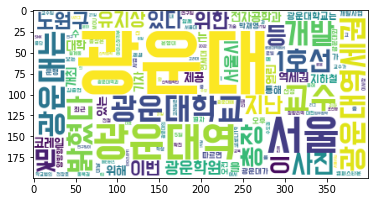

In [44]:
wc=WordCloud(font_path='/content/BMDOHYEON_ttf.ttf',background_color='white')
cloud=wc.generate_from_frequencies(dic)
plt.imshow(cloud)

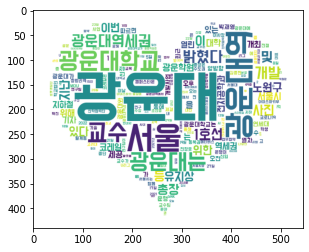

In [49]:
img=Image.open('하트.png')
img=np.array(img)
wc=WordCloud(font_path='/content/BMDOHYEON_ttf.ttf',background_color='white',mask=img)
cloud=wc.generate_from_frequencies(dic)
plt.imshow(cloud)